In [1]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [2]:
print(f"First 5 X features:\n{X[:5]}")
print(f"First 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 y labels:
[1 1 1 1 0]


In [10]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [12]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

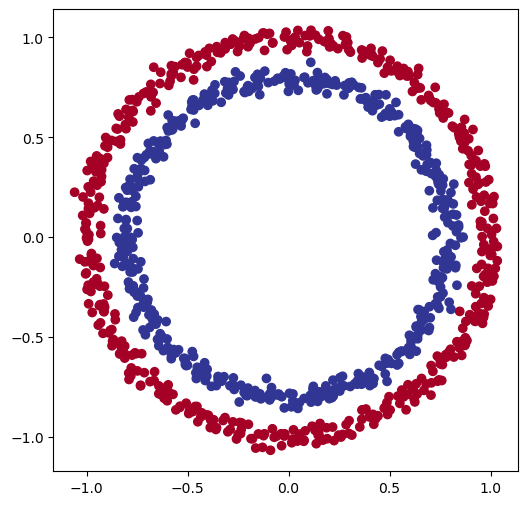

In [14]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6, 6)
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [15]:
X.shape, y.shape

((1000, 2), (1000,))

In [16]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [19]:
from torch import nn
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.layer2(self.layer1(x))

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
# `model_0` can be replaced by
model_0 = nn.Sequential(
    nn.Linear(2, 5),
    nn.Linear(5, 1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape : {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape : {X_test.shape}")

## Multiclass Classification 

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


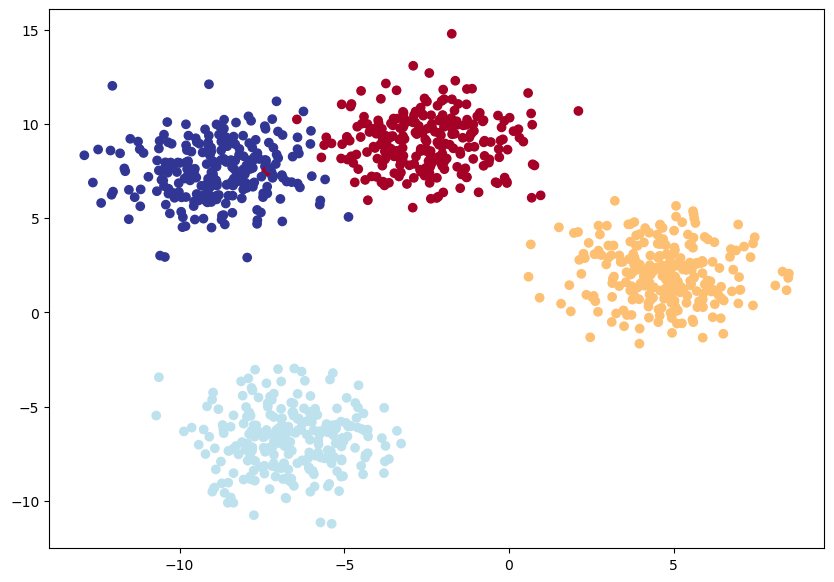

In [5]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [6]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

Using device: mps


In [7]:
from torch import nn

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer_stack(x)
    
model = BlobModel(input_features=NUM_FEATURES,
                 output_features=NUM_CLASSES,
                 hidden_units=8).to(device)
print(model)

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)


In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.1)

In [9]:
model(X_blob_train.to(device)[:5])

tensor([[-0.0296, -0.1856,  0.0847, -0.1352],
        [-0.3508, -0.3095,  0.3258, -0.2362],
        [-1.4044,  2.0450, -1.0536, -2.2493],
        [-0.8876,  1.2795, -0.6279, -1.4886],
        [-0.3009, -0.2561,  0.3283, -0.2748]], device='mps:0',
       grad_fn=<LinearBackward0>)

In [10]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [11]:
torch.manual_seed(RANDOM_SEED)

epochs = 100

X_blob_train = X_blob_train.to(device)
y_blob_train = y_blob_train.to(device)
X_blob_test = X_blob_test.to(device)
y_blob_test = y_blob_test.to(device)


for epoch in range(epochs):
    model.train()
    
    # 1. Forward pass
    y_logits = model(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true = y_blob_train,
                      y_pred = y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if epoch % 10 == 0:
        model.eval()
        with torch.inference_mode():
            test_logits = model(X_blob_test)
            test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
            test_loss = loss_fn(test_logits, y_blob_test)
            test_acc = accuracy_fn(y_true = y_blob_test,
                                y_pred = test_pred)
        print(f"Epoch: {epoch} | "
              f"Train loss: {loss:.5f} | "
              f"Train acc: {acc:.2f}% | "
              f"Test loss: {test_loss:.5f} | "
              f"Test acc: {test_acc:.2f}%")
    

Epoch: 0 | Train loss: 1.85677 | Train acc: 1.88% | Test loss: 1.19391 | Test acc: 35.50%
Epoch: 10 | Train loss: 0.28124 | Train acc: 95.12% | Test loss: 0.27199 | Test acc: 95.50%
Epoch: 20 | Train loss: 0.10117 | Train acc: 98.75% | Test loss: 0.09778 | Test acc: 99.00%
Epoch: 30 | Train loss: 0.04619 | Train acc: 99.25% | Test loss: 0.03864 | Test acc: 99.50%
Epoch: 40 | Train loss: 0.02982 | Train acc: 99.25% | Test loss: 0.02119 | Test acc: 99.50%
Epoch: 50 | Train loss: 0.02544 | Train acc: 99.25% | Test loss: 0.01807 | Test acc: 99.50%
Epoch: 60 | Train loss: 0.02350 | Train acc: 99.25% | Test loss: 0.01483 | Test acc: 99.50%
Epoch: 70 | Train loss: 0.02223 | Train acc: 99.25% | Test loss: 0.01255 | Test acc: 99.50%
Epoch: 80 | Train loss: 0.02114 | Train acc: 99.38% | Test loss: 0.01150 | Test acc: 99.50%
Epoch: 90 | Train loss: 0.02018 | Train acc: 99.38% | Test loss: 0.01000 | Test acc: 99.50%
